In [1]:
import os
from os.path import join as pj
import argparse
import sys
sys.path.append("modules")
import utils
import numpy as np
import torch as th
import scib
import scib.metrics as me
import anndata as ad
import scipy
import pandas as pd
import re
import itertools
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score
from scipy.stats import pearsonr
import copy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from operator import itemgetter
from collections import Counter
from tqdm import tqdm
import matplotlib

In [2]:
df1 = pd.read_csv("./analysis/overlap/overlap_percent.csv")
df2 = pd.read_csv("./analysis/overlap/overlap_percent_all.csv")
df3 = pd.read_csv("./analysis/overlap/overlap_percent_tissues.csv")
df4 = pd.read_csv("./analysis/overlap/overlap_percent_all_tissues.csv")
overlap_percent = df1['0'].tolist()
overlap_percent_all = df2['0'].tolist()
overlap_percent_tissues = df3['0'].tolist()
overlap_percent_all_tissues = df4['0'].tolist()
neigh_size = [5, 10, 100, 1000, 2500, 5000, 10000, 15000]

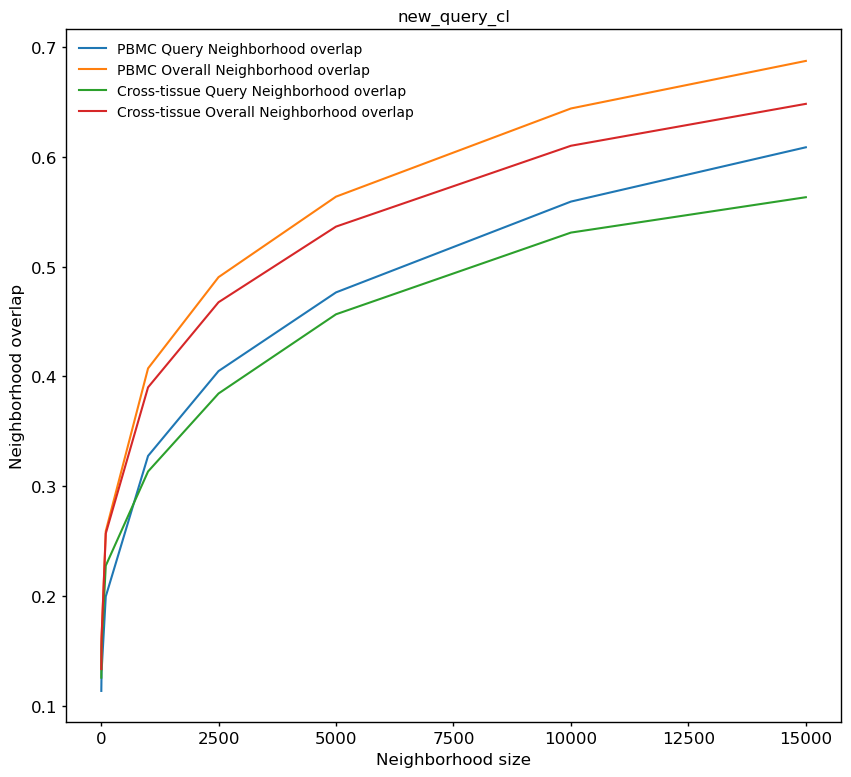

In [8]:
font = {'family':'times new roman', 
        'weight':'normal', 
        'size':15}

fig = plt.figure(figsize=(10,9))
ax=plt.axes()
ax.spines['bottom'].set_linewidth('1.0')
ax.spines['left'].set_linewidth('1.0')
ax.spines['top'].set_linewidth('1.0')
ax.spines['right'].set_linewidth('1.0')
plt.tick_params(axis="both", which="major", width=1, length=3)
plt.plot(neigh_size, overlap_percent[:8], label='PBMC Query Neighborhood overlap', linewidth =1.5)
plt.plot(neigh_size, overlap_percent_all[:8], label='PBMC Overall Neighborhood overlap', linewidth =1.5)
plt.plot(neigh_size, overlap_percent_tissues[:8], label='Cross-tissue Query Neighborhood overlap', linewidth =1.5)
plt.plot(neigh_size, overlap_percent_all_tissues[:8], label='Cross-tissue Overall Neighborhood overlap', linewidth =1.5)

plt.xlabel('Neighborhood size', fontsize=12)
plt.ylabel('Neighborhood overlap', fontsize=12)
plt.xticks([0, 2500, 5000, 7500, 10000, 12500, 15000], fontsize=12)
plt.yticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7], fontsize=12)
plt.title('new_query_cl', fontsize=12)
plt.legend(prop = {'size':10}, frameon=False)
matplotlib.rcParams['pdf.fonttype']=42
plt.savefig("./analysis/overlap/overlap_both.png")
plt.savefig("./analysis/overlap/overlap_both.pdf", format='pdf')
plt.show()